In [29]:
from scipy.stats import poisson
import numpy as np

In [92]:
s = 1000
tot_num_slots = 20
radius_perc = 0.7
grb_area_1 = 1
grb_area_2 = 2

lb = np.linspace(1, 1200, dtype='float64')
joint_area_per = np.linspace(0, 0.50, 16, dtype='float64')
num_reserved_slots = 2*np.linspace(0, 10, 11,dtype='float64')


In [99]:
data = np.empty( (len(num_reserved_slots),len(arrival_in_micro_cell),len(lb))) 
inversemj = 1

# per_cell_int = radius_perc**2/(1-joint_area_per[ajan])
per_cell_int = radius_perc**2
inversemM = grb_area_1*per_cell_int + grb_area_2* (1-per_cell_int)

for nrsn in range(len(num_reserved_slots)):
    sj = s*num_reserved_slots[nrsn]/tot_num_slots
    sM = s - sj
#     print(str(sj) + ' ' + str(sM))
    for ajan in range(len(joint_area_per)):
        for l in range(len(lb)):
#             Macro cell
            lbMi = lb[l]*(1-joint_area_per[ajan])
            pMi = lbMi * inversemM
            pcdf = poisson.cdf(sM, pMi)
            if pcdf == 0:
                psMi = 1
            else:
                psMi = poisson.pmf(sM, pMi)/pcdf
            tMc = lbMi*(1-psMi)
            
#             Joint area
            lbmi = lb[l]*joint_area_per[ajan]
            pmi = lbmi * inversemj
            pjcdf = poisson.cdf(sj, pmi)
            if pjcdf == 0:
                psmi = 1
            else:
                psmi = poisson.pmf(sj, pmi)/pjcdf
            tmc = lbmi*(1-psmi)
            
            data[nrsn][ajan][l] = tMc + tmc
            
    

In [100]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

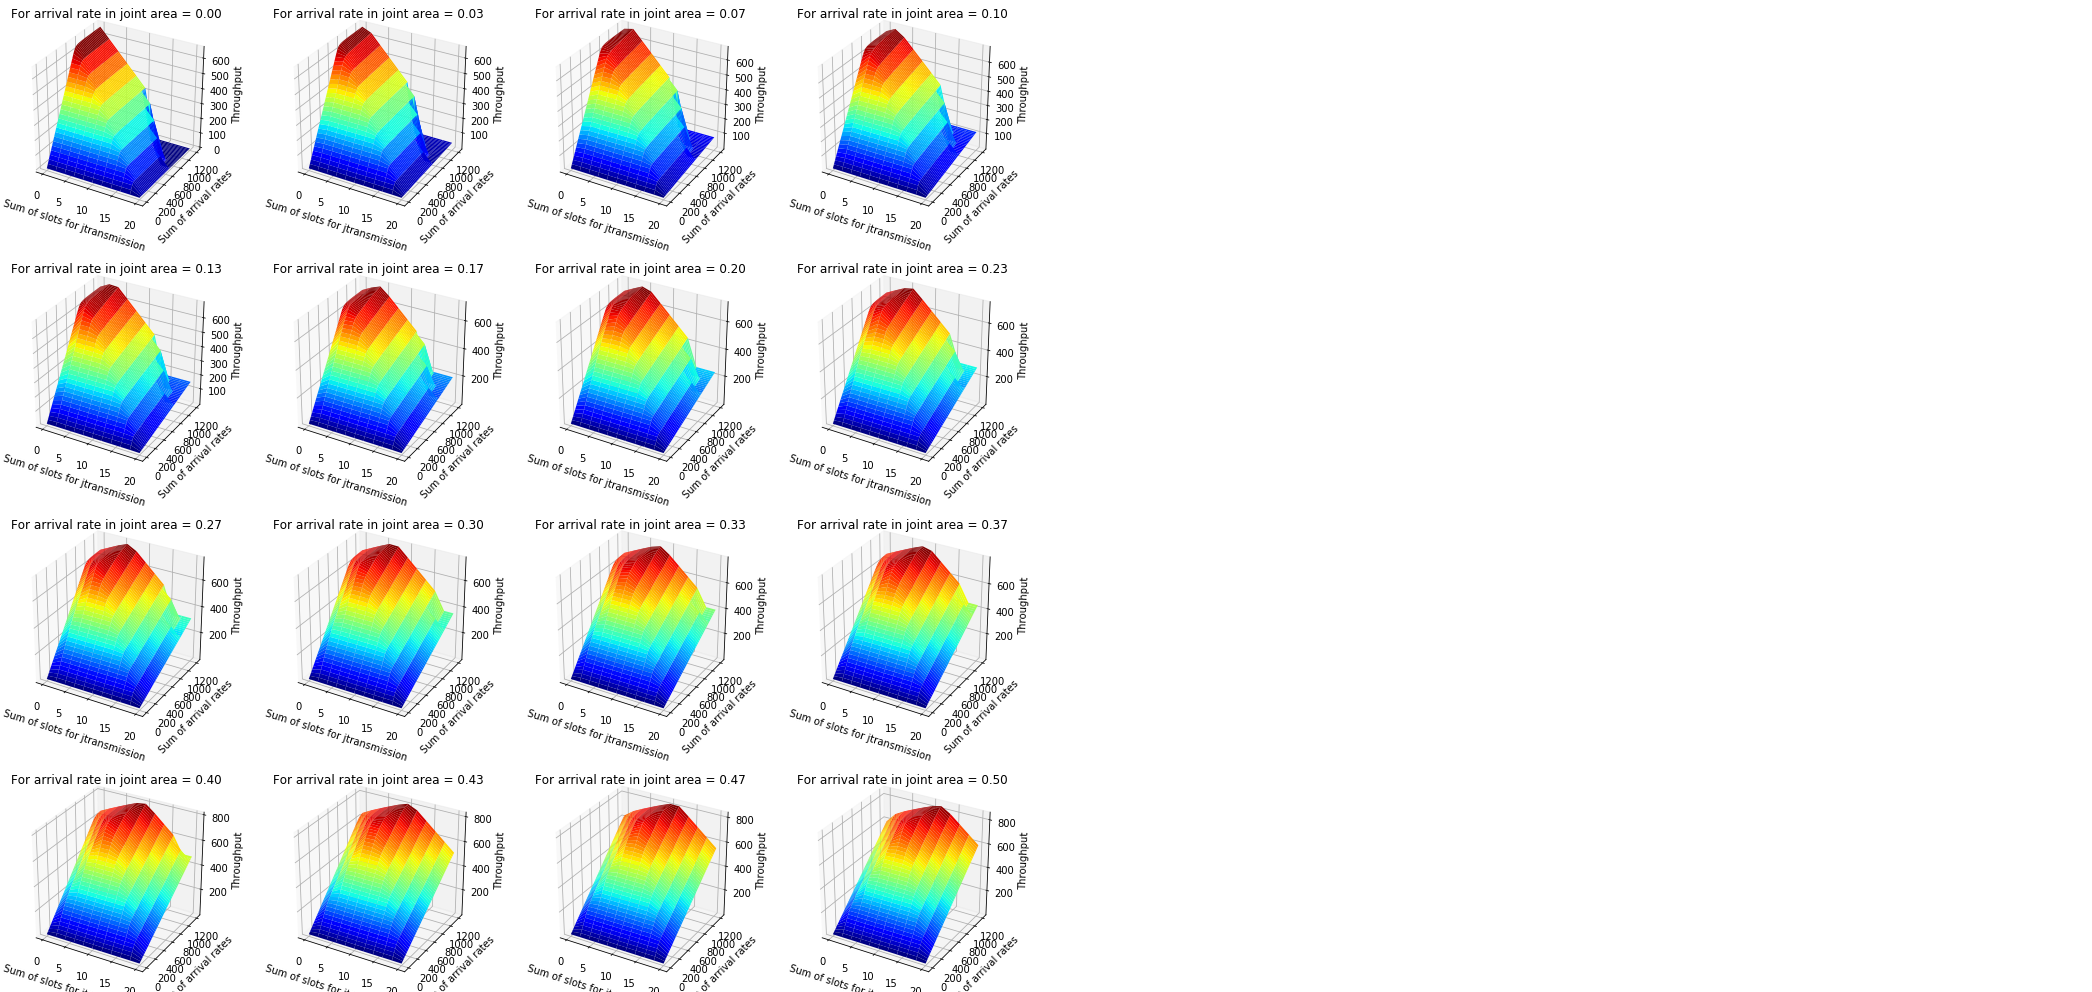

In [101]:
x, y = np.meshgrid(lb, num_reserved_slots)
# ax = plt.axes(projection='3d')
fig = plt.figure(figsize=(18, 18),facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i in range(1, 17):
    ax = fig.add_subplot(4, 4, i, projection='3d')
    ax.plot_surface(y, x, data[:, i-1, :], cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)
    ax.set_title('For arrival rate in joint area = '+'%.2f' % arrival_in_micro_cell[i-1])
    ax.set_xlabel('Sum of slots for jtransmission')
    ax.set_ylabel('Sum of arrival rates')
    ax.set_zlabel('Throughput')

fig.savefig('./joint_trans/fig0.png')

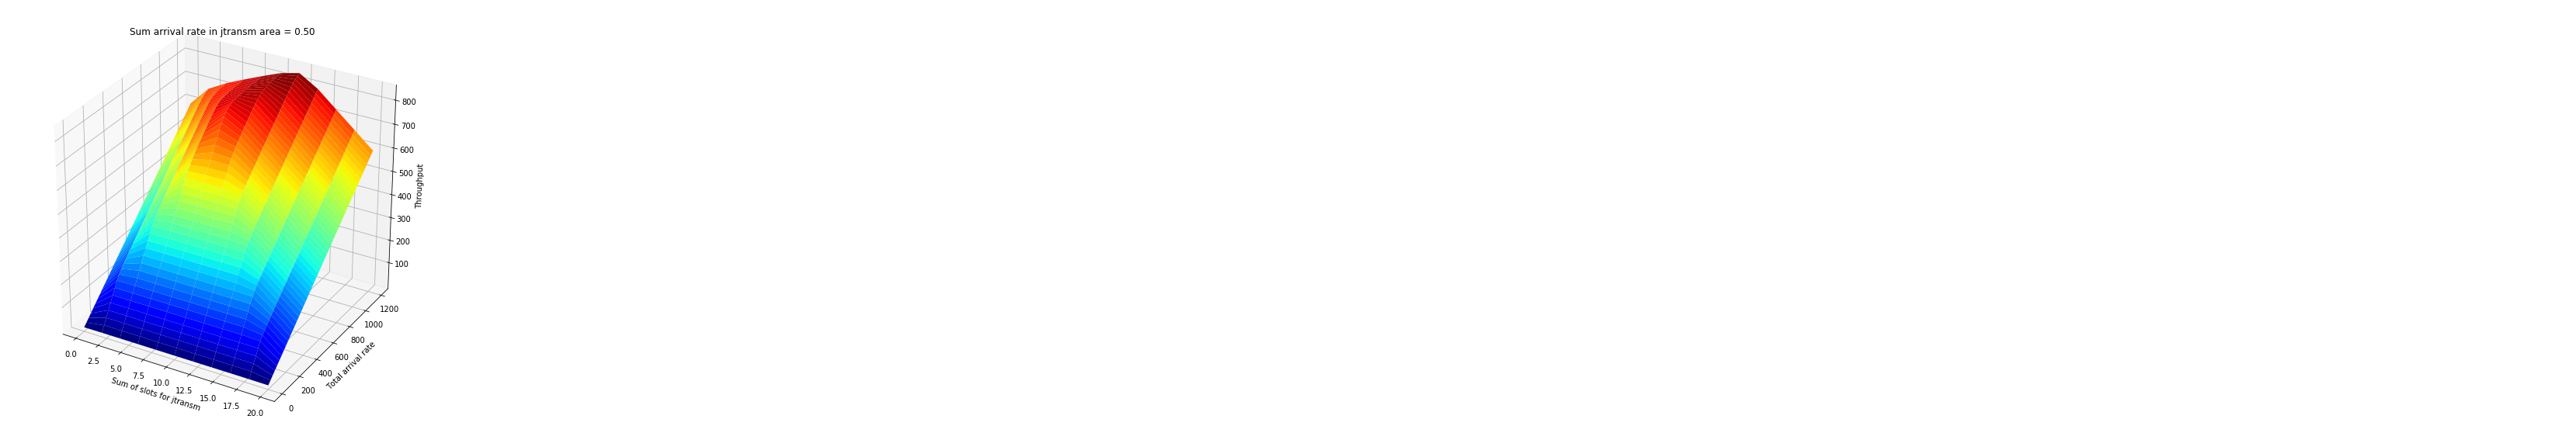

In [104]:
x, y = np.meshgrid(lb, num_reserved_slots)
# ax = plt.axes(projection='3d')
fig = plt.figure(figsize=(10, 10),facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for i in range(1, 17):
    ax = plt.axes(projection='3d')
    ax.plot_surface(y, x, data[:, i-1, :], cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)
    ax.set_title('Sum arrival rate in jtransm area = '+'%.2f' % arrival_in_micro_cell[i-1])
    ax.set_xlabel('Sum of slots for jtransm')
    ax.set_ylabel('Total arrival rate')
    ax.set_zlabel('Throughput')
    fig.savefig('./joint_trans/fig'+ str(i)+'.png')
